In [27]:
import os
import glob

import numpy as np
import pandas as pd

from PIL import Image


In [43]:
dir_base = '/Users/alexanderfederation/projects/kaggle/rsna/'
dir_csv = dir_base + 'csv/stage_1_train.csv'
dir_train_img = 'data/train_stage1_png/'

In [58]:
def prepare_csv(csv):
    df = pd.read_csv(csv)
    df[['ID', 'Image', 'Type']] = df['ID'].str.split('_', expand=True)
    df = df[['Image', 'Type', 'Label']]
    df.drop_duplicates(inplace=True)
    df = df.pivot(index='Image', columns='Type', values='Label').reset_index()
    df['Image'] = 'ID_' + df['Image'] + '.png'

    return df

In [59]:
train = prepare_csv(dir_csv)
train.head()

Type,Image,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
0,ID_000039fa0.png,0,0,0,0,0,0
1,ID_00005679d.png,0,0,0,0,0,0
2,ID_00008ce3c.png,0,0,0,0,0,0
3,ID_0000950d7.png,0,0,0,0,0,0
4,ID_0000aee4b.png,0,0,0,0,0,0


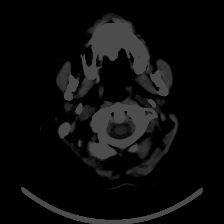

In [60]:
Image.open('data/train_stage1_png/ID_0000aee4b.png')

In [61]:
def remove_corrupt_images(df, img_path):
    '''
    '''
    png = glob.glob(os.path.join(img_path, '*.png'))
    png = [os.path.basename(png) for png in png]
    png = np.array(png)
    df = df[df['Image'].isin(png)]
    return df
    
proc = remove_corrupt_images(train, dir_train_img)    

In [62]:
print(train.shape)
print(proc.shape)

(674258, 7)
(671796, 7)


In [63]:
proc.head()

Type,Image,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
0,ID_000039fa0.png,0,0,0,0,0,0
1,ID_00005679d.png,0,0,0,0,0,0
2,ID_00008ce3c.png,0,0,0,0,0,0
3,ID_0000950d7.png,0,0,0,0,0,0
4,ID_0000aee4b.png,0,0,0,0,0,0


In [64]:
proc.to_csv('csv/train_processed.csv', index=False)